In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/DataUpdated.csv')
df.head()

In [ ]:
df.columns

Index(['EmpID', 'PerfScoreID', 'Salary', 'PositionID', 'Position', 'State',
       'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'RaceDesc', 'DateofHire',
       'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department',
       'RecruitmentSource', 'PerformanceScore', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'Absences',
       'NewCompany', 'NewPosition'],
      dtype='object')

Now if we observe carefully, there are some columns that obviously do not add to the market trend analysis like ‘EmpID’ , ‘PositionID’, 'RecruitmentSource', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'Absences' and so on. We will get rid of these redundant columns.

In [ ]:
df = df.drop(['EmpID', 'DOB','PositionID', 'RecruitmentSource', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'Absences',],axis = 1)
df.head()

,PerfScoreID,Salary,Position,State,Sex,MaritalDesc,CitizenDesc,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,PerformanceScore,EmpSatisfaction,NewCompany,NewPosition
0,3,63000,Accountant I,MA,F,Married,US Citizen,Black or African American,10/27/2008,NaN,N/A-StillEmployed,Active,Admin Offices,Fully Meets,2,NaN,NaN
1,3,64520,Accountant I,MA,M,Divorced,US Citizen,Black or African American,01/06/2014,NaN,N/A-StillEmployed,Active,Admin Offices,Fully Meets,4,NaN,NaN
2,3,63003,Accountant I,MA,M,Single,US Citizen,White,9/29/2014,NaN,N/A-StillEmployed,Active,Admin Offices,Fully Meets,5,NaN,NaN
3,3,49920,Administrative Assistant,MA,F,Married,US Citizen,Black or African American,2/16/2015,4/15/2015,"no-call, no-show",Terminated for Cause,Admin Offices,Fully Meets,3,Datadog,Administrative Assistant
4,3,55000,Administrative Assistant,MA,F,Married,US Citizen,Black or African American,9/26/2011,9/25/2013,career change,Voluntarily Terminated,Admin Offices,Fully Meets,4,PWC,Business Analyst


Let’s check whether there are duplicates in our data.

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe() #Understand the statistics of given data.

,PerfScoreID,Salary,EmpSatisfaction
count,311.000000,311.000000,311.000000
mean,2.977492,69020.684887,3.890675
std,0.587072,25156.636930,0.909241
min,1.000000,45046.000000,1.000000
25%,3.000000,55501.500000,3.000000
50%,3.000000,62810.000000,4.000000
75%,3.000000,72036.000000,5.000000
max,4.000000,250000.000000,5.000000


In [ ]:
df.Position.unique()

array(['Accountant I', 'Administrative Assistant', 'Area Sales Manager',
       'BI Developer', 'BI Director', 'CIO', 'Data Analyst',
       'Data Architect', 'Database Administrator',
       'Director of Operations', 'Director of Sales',
       'Enterprise Architect', 'IT Director', 'IT Manager - DB',
       'IT Manager - Infra', 'IT Manager - Support', 'IT Support',
       'Network Engineer', 'President & CEO', 'Principal Data Architect',
       'Production Manager', 'Production Technician I',
       'Production Technician II', 'Operations Technician',
       'Sales Manager', 'Senior BI Developer', 'Shared Services Manager',
       'Software Engineer', 'Software Engineering Manager',
       'Sr. Accountant', 'Sr. DBA', 'Sr. Network Engineer'], dtype=object)

In [ ]:
df.TermReason.unique()

array(['N/A-StillEmployed', 'no-call, no-show', 'career change',
       'Another position', 'attendance', 'relocation out of area',
       'Fatal attraction', 'performance', 'hours', 'medical issues',
       'retiring', 'unhappy', 'return to school', 'more money',
       'maternity leave - did not return', 'gross misconduct', 'military'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
df.Position = le.fit_transform(df.Position)
df.State = le.fit_transform(df.State)
df.MaritalDesc = le.fit_transform(df.MaritalDesc)
df.CitizenDesc = le.fit_transform(df.CitizenDesc)
df.RaceDesc = le.fit_transform(df.RaceDesc)
df.TermReason = le.fit_transform(df.TermReason)
df.EmploymentStatus= le.fit_transform(df.EmploymentStatus)
df.Department= le.fit_transform(df.Department)
df.PerformanceScore= le.fit_transform(df.PerformanceScore)
df.NewCompany= le.fit_transform(df.NewCompany)
df.NewPosition= le.fit_transform(df.NewPosition)
df

,PerfScoreID,Salary,Position,State,Sex,MaritalDesc,CitizenDesc,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,PerformanceScore,EmpSatisfaction,NewCompany,NewPosition
0,3,63000,0,10,0,1,2,2,10/27/2008,NaN,2,0,0,1,2,18,32
1,3,64520,0,10,1,0,2,2,01/06/2014,NaN,2,0,0,1,4,18,32
2,3,63003,0,10,1,3,2,5,9/29/2014,NaN,2,0,0,1,5,18,32
3,3,49920,1,10,0,1,2,2,2/16/2015,4/15/2015,11,1,0,1,3,4,1
4,3,55000,1,10,0,1,2,2,9/26/2011,9/25/2013,4,2,0,1,4,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,3,92329,31,4,1,3,2,5,11/10/2014,NaN,2,0,2,1,3,18,32
307,3,85028,31,4,0,1,2,5,11/10/2014,NaN,2,0,2,1,5,18,32
308,3,93206,31,10,1,1,2,5,11/10/2014,NaN,2,0,2,1,5,18,32
309,3,87565,31,10,1,1,2,1,6/30/2016,NaN,2,0,2,1,4,18,32


<Axes: ylabel='Sex'>

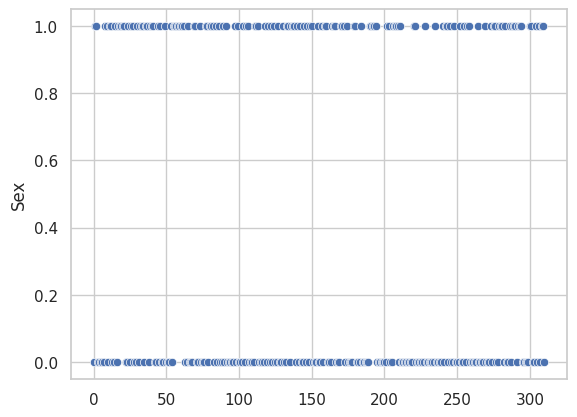

In [ ]:
sns.scatterplot(df.Sex,palette = 'inferno')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PerfScoreID        311 non-null    int64 
 1   Salary             311 non-null    int64 
 2   Position           311 non-null    int64 
 3   State              311 non-null    int64 
 4   Sex                311 non-null    int64 
 5   MaritalDesc        311 non-null    int64 
 6   CitizenDesc        311 non-null    int64 
 7   RaceDesc           311 non-null    int64 
 8   DateofHire         311 non-null    object
 9   DateofTermination  104 non-null    object
 10  TermReason         311 non-null    int64 
 11  EmploymentStatus   311 non-null    int64 
 12  Department         311 non-null    int64 
 13  PerformanceScore   311 non-null    int64 
 14  EmpSatisfaction    311 non-null    int64 
 15  NewCompany         311 non-null    int64 
 16  NewPosition        311 non-null    int64 
dt